# Multi-Dimensional Exploration Is Possible!
(At least mathematically)

This Jupyter notebook is related to the Medium article [Multi-Dimensional Exploration Is Possible! 
](https://towardsdatascience.com/multi-dimensional-exploration-is-possible-212b99171706?sk=632481de6a974f81ab88fdaf4cf25269). The plots and images shown in this article were built using the code here. To read an introduction to Principal Component Analysis (PCA) and its applications please visit the article webpage [here](https://towardsdatascience.com/multi-dimensional-exploration-is-possible-212b99171706?sk=632481de6a974f81ab88fdaf4cf25269).

## Introduction
This notebook explains how to perform PCA analysis to a simple case and how to apply this idea in an image recognition problem. Part of the code can be used to analyze other problems with larger datasets.

### Libraries

In [66]:
import numpy as np
from numpy import linalg as LA
from sklearn.decomposition import PCA
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from numpy import linalg as LA
from PIL import Image

### Part 1. From 2D to 1D
This section contains an example of how to perform PCA on a 2D dataset. The importance of this exercise is that it can visually explain what PCA is doing and what the end result is.

The following code:
1. Define a matrix *A* using random integer numbers from 0 to 20
2. Define two random vectors that will define two lines that represent the 1D space in which the points in 2D will be projected. These vectors are stored in an array *vectors*
3. Normalize the vectors so that the dot product between *A* and *vectors* will result in the projection of the 2D points onto the 1D spaces defined by the vectors
4. Plot the results

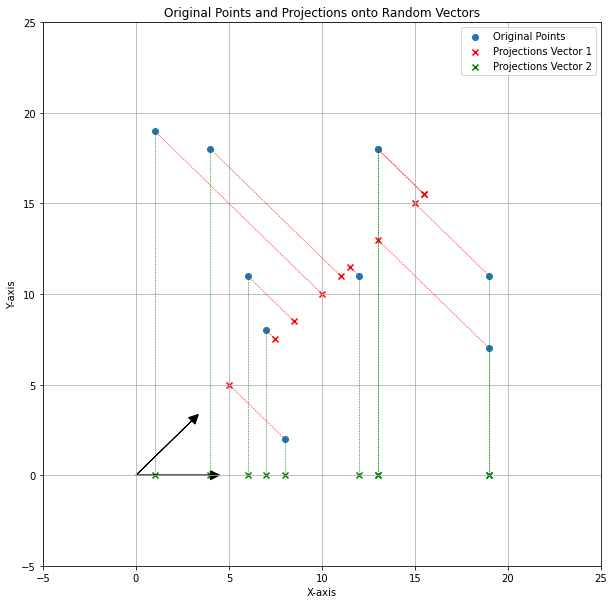

In [2]:
# Define matrix A using random numbers
A=np.random.randint(21,size=(10,2))

# Define two random vectors to project the 2D dataset onto
vectors=np.random.randint(5,size=(2,2))

# Normalize the vectors
vectors_n=np.zeros_like(vectors, dtype=float)
vectors_n[0]=vectors[0]/np.sqrt(np.power(vectors[0][0],2)+np.power(vectors[0][1],2))
vectors_n[1]=vectors[1]/np.sqrt(np.power(vectors[1][0],2)+np.power(vectors[1][1],2))

# Calculate projections by multiplying A with B
projections1 = np.dot(np.dot(A, vectors_n[0].reshape(2,1)),np.transpose(vectors_n[0].reshape(2,1)))
projections2 = np.dot(np.dot(A, vectors_n[1].reshape(2,1)),np.transpose(vectors_n[1].reshape(2,1)))

# Create a scatter plot of the original points
plt.figure(figsize=(10, 10)) 
plt.scatter(A[:, 0], A[:, 1], label='Original Points')

# Create a line with the vectors and arrows
plt.arrow(0, 0, vectors[0][0], vectors[0][1], head_width=0.5, head_length=0.5, fc='black', ec='black')
plt.arrow(0, 0, vectors[1][0], vectors[1][1], head_width=0.5, head_length=0.5, fc='black', ec='black')

# Plot projections onto the eigenvectors
plt.scatter(projections1[:, 0], projections1[:, 1], label='Projections Vector 1', marker='x', color='red')
plt.scatter(projections2[:, 0], projections2[:, 1], label='Projections Vector 2', marker='x', color='green')

# Plot lines that connect the data points with the projections
for i in range(A.shape[0]):
    plt.plot((A[i,0],projections1[i,0]),(A[i,1],projections1[i,1]),'r--', linewidth=0.5)
    plt.plot((A[i,0],projections2[i,0]),(A[i,1],projections2[i,1]),'g--', linewidth=0.5)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-5,25)
plt.ylim(-5,25)
plt.legend()

# Show the plot
plt.grid()
plt.title('Original Points and Projections onto Random Vectors')
plt.show()


In the previous example, the projections of the original points are made onto arbitrary 1D spaces defined by the random vectors. The projection of the points might not be the best projection. However, the projections made by PCA will find two orthogonal vectors that represent the directions with the highest covariance in the original data. The first eigenvector (the one with the biggest eigenvalue) represents the best possible projection onto a 1D space.

The following code:
1. Calculate the principal components for the matrix A using the sklearn library
2. The principal components are saved in variable called *eigenvectors*
3. Project the original data onto the 1D spaces defined by the eigenvectors
4. Plot the results

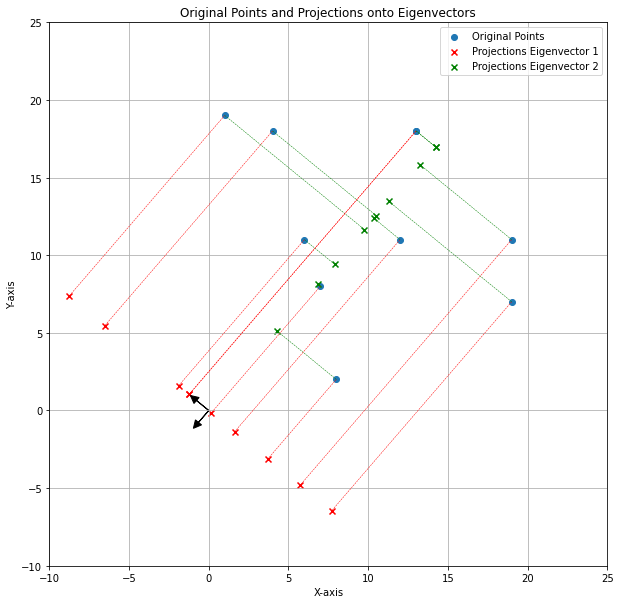

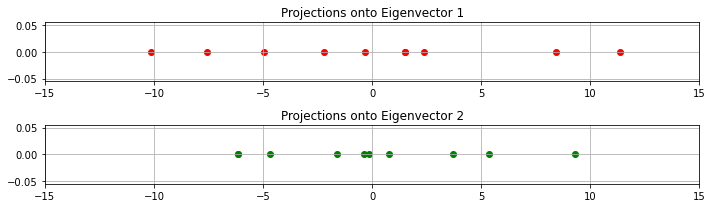

In [3]:
#Calculate the Principal Components (eigenvectors)
pca = PCA(n_components=2) #Specify the number of components
transformed_data = pca.fit_transform(A)
eigenvectors = pca.components_
eigenvalues=pca.explained_variance_

# Calculate projections by multiplying A with B
projections1 = np.dot(np.dot(A, eigenvectors[0].reshape(2,1)),np.transpose(eigenvectors[0].reshape(2,1)))
projections2 = np.dot(np.dot(A, eigenvectors[1].reshape(2,1)),np.transpose(eigenvectors[1].reshape(2,1)))

# Create a scatter plot of the original points
plt.figure(figsize=(10, 10)) 
plt.scatter(A[:, 0], A[:, 1], label='Original Points')

# Create a line with the vectors and arrows
plt.arrow(0, 0, eigenvectors[0][0], eigenvectors[0][1], head_width=0.5, head_length=0.5, fc='black', ec='black')
plt.arrow(0, 0, eigenvectors[1][0], eigenvectors[1][1], head_width=0.5, head_length=0.5, fc='black', ec='black')

# Plot projections onto the eigenvectors
plt.scatter(projections1[:, 0], projections1[:, 1], label='Projections Eigenvector 1', marker='x', color='red')
plt.scatter(projections2[:, 0], projections2[:, 1], label='Projections Eigenvector 2', marker='x', color='green')

# Plot lines that connect the data points with the projections
for i in range(A.shape[0]):
    plt.plot((A[i,0],projections1[i,0]),(A[i,1],projections1[i,1]),'r--', linewidth=0.5)
    plt.plot((A[i,0],projections2[i,0]),(A[i,1],projections2[i,1]),'g--', linewidth=0.5)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-10,25)
plt.ylim(-10,25)
plt.legend()

# Show the plot
plt.grid()
plt.title('Original Points and Projections onto Eigenvectors')
plt.show()


plt.figure(figsize=(10, 3))
plt.subplot(2,1,1)
plt.scatter(transformed_data[:, 0],np.zeros(transformed_data[:,0].shape[0]),color='r')
plt.title('Projections onto Eigenvector 1')
plt.grid()
plt.xlim(-15,15)

plt.subplot(2,1,2)
plt.scatter(transformed_data[:, 1],np.zeros(transformed_data[:,0].shape[0]),color='g')
plt.title('Projections onto Eigenvector 2')
plt.grid()
plt.xlim(-15,15)

plt.tight_layout()
plt.show()


Note how in the previous picture the spread in Eigenvector 1 is bigger than the spread in Eigenvector 2. So the Eigenvector 1 represents the 2D space with a bigger variation than Eigenvector 2 and any other arbitrary vector.

Internally, what the `sklearn` library does is:
1. Calculate a covariance matrix using the original data stored in matrix $A$. Generally, the original data is standardized before calculating the covariances.
2. Calculate the eigenvectors and eigenvalues of this matrix. The eigenvectors in a matrix $EV$ following the order of the biggest eigenvalue
3. The transformed data is the multiplication of the original data (standardized) times $EV$. This $EV$ only contains the number eigenvectors desired for the transformation. This means that a 10-dimensions dataset of $(nx10)$ that is to be transformed into 3 dimensions, will be multiplied by a $EV$ matrix of $(3x3)$.

$Transformed=A \times EV$ 

4. To project the transformed data back into the original space, the Transformed dataset is multiplied by the transpose of $EV$.

$Projected=A \times EV \times (EV)^T$

### Part 2. From 3D to 2D

The following example shows how to project a 3-dimensional dataset into a 2-dimensional dataset. This code:
1. Generates a random matrix A with integer numbers
2. Calculates the eigenvectors and eigenvalues of the 2 principal components
3. Calculates the transformed 2D dataset (`transformed_3d`)
4. Calculates the projected dataset in 3D (`projected_3d`)
5. Plots the original points as well as the projected points and its plane
6. Plots the transformed 2D dataset

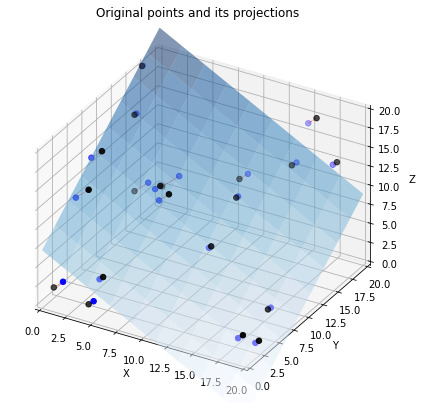

This is how the points would look like in a 2D space:


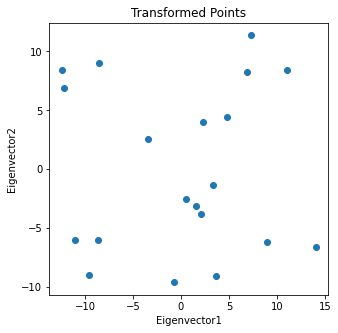

This is how the points would look like if they are projected onto XY, XZ and YZ planes:


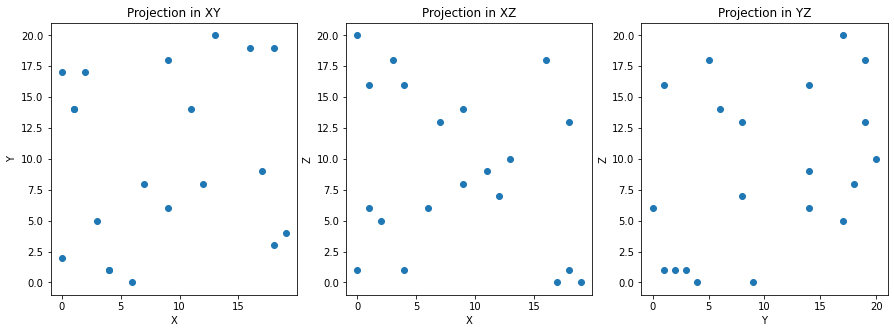

In [4]:
# Define matrix A using random numbers
A=np.random.randint(21,size=(20,3))

#Calculate the Principal Components
pca3d = PCA(n_components=2)  #Specify the desired number of components
transformed_3d = pca3d.fit_transform(A)
eigenvectors_3d = pca3d.components_ #Save the eigenvectors
eigenvalues_3d=pca3d.explained_variance_ #Save the eigenvalues

#Calculate the projection of the transformed data (2D) in a 3D space
projected_3d=pca3d.inverse_transform(transformed_3d)


#Generate a plane that contains the projected points
 #Take some points from the projected surface and dalculate two vectors lying on the plane
v1=np.array([[projected_3d[0,0]-projected_3d[1,0],projected_3d[0,1]-projected_3d[1,1],projected_3d[0,2]-projected_3d[1,2]]])
v2=np.array([[projected_3d[2,0]-projected_3d[1,0],projected_3d[2,1]-projected_3d[1,1],projected_3d[2,2]-projected_3d[1,2]]])

 #Find a normal vector to the plane
N=np.cross(v1,v2)

 #Since the plane equation is Ax+By+Cz+D=0 we need to find D. For this we take one of the original points:
D=-N[0,0]*projected_3d[0,0]-N[0,1]*projected_3d[0,1]-N[0,2]*projected_3d[0,2]

 #Now we calculate the z for multiple x and y points
x_range = np.linspace(0, 20, 10)
y_range = np.linspace(0, 20, 10)
x_range, y_range = np.meshgrid(x_range, y_range)
z_calc = -1/N[0,2]*(D+N[0,1]*y_range+N[0,0]*x_range)

#Plot the results

#Uncomment the following line if you want to rotate the 3D plot
#%matplotlib notebook #

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_range, y_range, z_calc, cmap=cm.Blues, alpha=0.5) #Plane
ax.scatter(A[:,0], A[:,1], A[:,2], color='black', s=30) #Original points
ax.scatter(projected_3d[:,0],projected_3d[:,1],projected_3d[:,2],color='blue', s=30) #Projections
# Plot lines that connect the data points with the projections
for i in range(A.shape[0]):
    ax.plot3D((A[i,0],projected_3d[i,0]),(A[i,1],projected_3d[i,1]),(A[i,2],projected_3d[i,2]),'r--', linewidth=0.5)

#Formatting of the plot
ax.set_title('Original points and its projections')
ax.set_proj_type('ortho')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim3d(0, 20)
ax.set_ylim3d(0, 20)
ax.set_zlim3d(0, 20)
plt.show()

print("This is how the points would look like in a 2D space:")
plt.figure(figsize=(5, 5)) 
plt.scatter(transformed_3d[:, 0], transformed_3d[:, 1], label='Transformed Points')
plt.xlabel('Eigenvector1')
plt.ylabel('Eigenvector2')
plt.title('Transformed Points')
plt.show()

print("This is how the points would look like if they are projected onto XY, XZ and YZ planes:")
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.scatter(A[:, 0], A[:, 1], label='Transformed Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Projection in XY')

plt.subplot(1,3,2)
plt.scatter(A[:, 0], A[:, 2], label='Transformed Points')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Projection in XZ')

plt.subplot(1,3,3)
plt.scatter(A[:, 1], A[:, 2], label='Transformed Points')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Projection in YZ')
plt.show()




### Part 3. The projection of a carrot
The article associated with this notebook shows an example in which a group of points in the shape of a carrot are projected onto different planes and then PCA is used to find the best projection. The following code shows how to generate a group of points that look like a carrot.
1. The variable `points` define the number of points used to plot the carrot
2. The variable `carrot` stores the (x,y,z) coordinates of the carrot
3. The loop takes random variables of z (carrot height) and calculates the radius of two inverted cones depending on the value of z. The top cone has a smaller radius than the lower cone. 
    The loop also calculates random variables of $\theta$ (theta) and with this it then calculates x and y according. The x,y,z coordinates of each point are saved on a variable `carrot`
4. Optionally, the carrot can be rotated along its x and y axis
5. Plot the results
6. Apply PCA to find the best two principal components
7. Plot the transformed dataset projected on a 3D space
8. Plot the transformed dataset in 2D as well as the projections in the XY, XZ and YZ planes

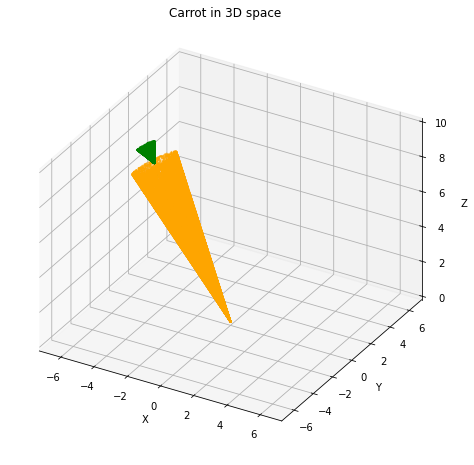

Use PCA to find the best projection in 2D:


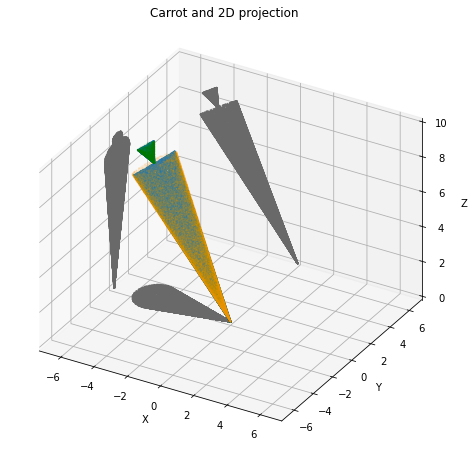

This is how the points would look like in a 2D space:


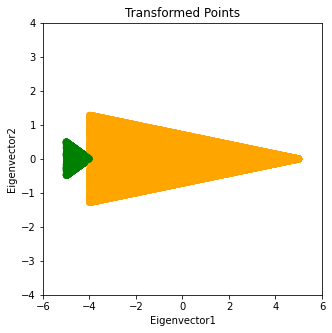

This is how the points would look like if they are projected onto XY, XZ and YZ planes:


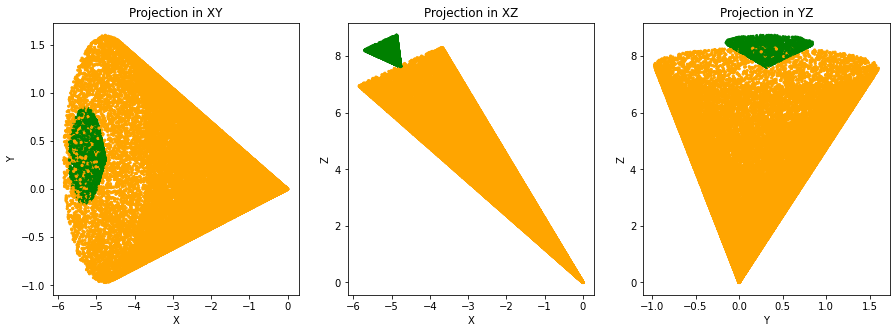

In [64]:
#Define the number of points and the carrot variable
points=40000
carrot=np.zeros((points,3))

for i in range(points):
    z=np.random.rand()*(10-0)+0
    theta=np.random.rand()*2*np.pi
    if z>9:
        r=0.5*z-4.5
    else:
        r=1/7*z
    #r=1    
    x=np.sin(theta)*r
    y=np.cos(theta)*r
    
    carrot[i,0]=x
    carrot[i,1]=y
    carrot[i,2]=z

#Apply rotation
angle_x=np.random.randint(0,45) #45
angle_y=np.random.randint(0,45) #72
Rx=np.array([[1,0,0],[0,np.cos(angle_x*np.pi/180),-np.sin(angle_x*np.pi/180)],[0,np.sin(angle_x*np.pi/180),np.cos(angle_x*np.pi/180)]])
Ry=np.array([[np.cos(angle_y*np.pi/180),0,np.sin(angle_y*np.pi/180)],[0,1,0],[-np.sin(angle_y*np.pi/180),0,np.cos(angle_y*np.pi/180)]])
carrot_r=np.dot(np.dot(carrot,Rx),Ry)

#Plotting
#Uncomment the following line if you want to rotate the 3D plot
#%matplotlib notebook

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_proj_type('ortho')
colors = np.where((carrot[:,2] >= 9) & (carrot[:,2] <= 10), 'green', 'orange')
ax.scatter(carrot_r[:,0], carrot_r[:,1], carrot_r[:,2],s=1,c=colors) #Input

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim3d(-7, 7)
ax.set_ylim3d(-7, 7)
ax.set_zlim3d(0,10)
ax.set_title('Carrot in 3D space')
plt.show()

print('Use PCA to find the best projection in 2D:')

#PCA
pca_carrot = PCA(n_components=2)  # Specify the desired number of components
transformed_carrot = pca_carrot.fit_transform(carrot_r)
projected=pca_carrot.inverse_transform(transformed_carrot)

#Projection onto XZ
XZ_proj=np.dot(carrot_r,np.array([[1,0],[0,0],[0,1]]))
#Projection onto XY
XY_proj=np.dot(carrot_r,np.array([[1,0],[0,1],[0,0]]))
#Projection onto YZ
YZ_proj=np.dot(carrot_r,np.array([[0,0],[1,0],[0,1]]))

#Plot
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_proj_type('ortho')
ax.scatter(carrot_r[:,0], carrot_r[:,1], carrot_r[:,2], alpha=0.05,s=0.5,c=colors) #Input
ax.scatter(projected[:,0],projected[:,1],projected[:,2], s=0.5, c='tab:blue') #Projection PCA
ax.scatter(XZ_proj[:,0],7,XZ_proj[:,1], s=0.5, c='dimgrey') #Projection XZ
ax.scatter(XY_proj[:,0],XY_proj[:,1],0, s=0.5, c='dimgrey') #Projection XY
ax.scatter(-7,YZ_proj[:,0],YZ_proj[:,1], s=0.5, c='dimgrey') #Projection XY
ax.set_xlim3d(-7, 7)
ax.set_ylim3d(-7, 7)
ax.set_zlim3d(0,10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Carrot and 2D projection')
plt.show()

print("This is how the points would look like in a 2D space:")
plt.figure(figsize=(5, 5)) 
plt.scatter(transformed_carrot[:, 0], transformed_carrot[:, 1], label='Transformed Points',c=colors)
plt.xlabel('Eigenvector1')
plt.ylabel('Eigenvector2')
plt.xlim(-6,6)
plt.ylim(-4,4)
plt.title('Transformed Points')
plt.show()

print("This is how the points would look like if they are projected onto XY, XZ and YZ planes:")
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.scatter(XY_proj[:, 0], XY_proj[:, 1], label='Transformed Points', color=colors,s=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Projection in XY')

plt.subplot(1,3,2)
plt.scatter(XZ_proj[:, 0], XZ_proj[:, 1], label='Transformed Points',color=colors,s=5)
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Projection in XZ')

plt.subplot(1,3,3)
plt.scatter(YZ_proj[:, 0], YZ_proj[:, 1], label='Transformed Points',color=colors,s=5)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Projection in YZ')
plt.show()


### Part 4. Applying PCA to an image
This final section contains an example of how to apply PCA to an image. In this example a color image is loaded using the library `Pillow` and it is converted into a grayscale image to simplify the process. Then, PCA is applied to this image to reduce its dimensionality.

#### Octopus:
The following code:
1. Loads a 50x50 pixels color image of an Octopus
2. Converts the image into a grayscale image
3. Converts the grayscale image into an Numpy array
4. Applies PCA to this image and compares the result with the original image

These are the original images:


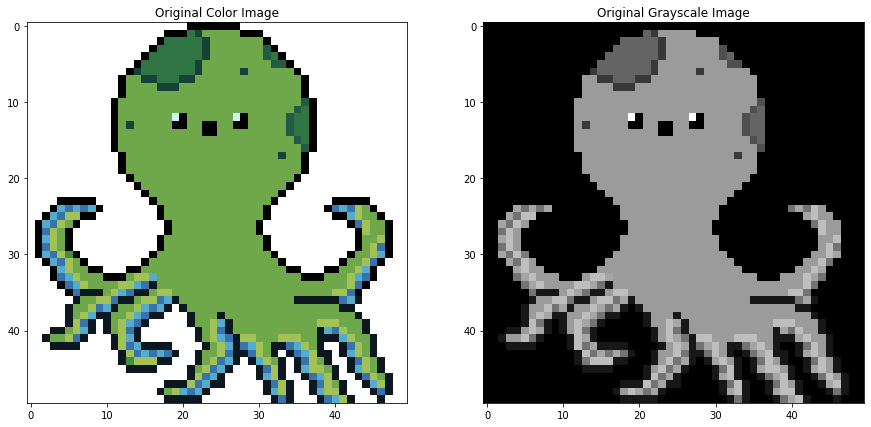

After applying PCA:


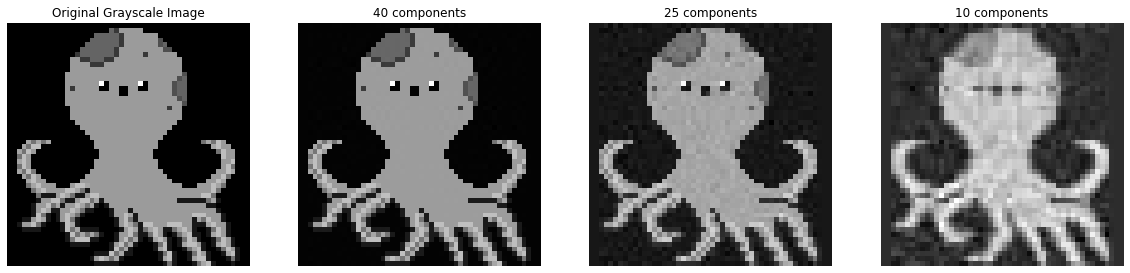

In [109]:
#Load the octopus_50x50 image using Pillow
octopus_50x50 = Image.open("octopus_50x50.png")  # Replace with the actual path to your image

#Convert the image to a NumPy array
octopus_50x50_array = np.array(octopus_50x50)

#Convert the image into grayscale
grayscale_octopus_50x50 = octopus_50x50.convert("L")  # Converts to grayscale (2D array)

#Convert the grayscale image to a NumPy array
grayscale_octopus_50x50_array = np.array(grayscale_octopus_50x50)

#Applying PCA to octopus_50x50

#Generate a list with the PCs that will be tested:
num_components_list=[40, 30, 25, 20, 10]

#Store all results in a dictionary to access them later
pca_results={}

#Loop that calculates PCs according to the list and then store the result in a dictionary
for PCs in num_components_list:
    pca_octopus = PCA(n_components=PCs)
    pca_octopus.fit(grayscale_octopus_50x50_array)
    octopus_transformed=pca_octopus.transform(grayscale_octopus_50x50_array)
    octopus_projected=pca_octopus.inverse_transform(octopus_transformed)
    pca_results[PCs]=octopus_projected

#Plot
print("These are the original images:")
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(octopus_50x50_array)
plt.title("Original Color Image")

plt.subplot(1,2,2)
plt.imshow(grayscale_octopus_50x50_array,cmap='gray')
plt.title("Original Grayscale Image")
plt.show()

print("After applying PCA:")
plt.figure(figsize=(20, 10))
plt.subplot(1, len(num_components_list) +1, 1)
plt.imshow(grayscale_octopus_50x50_array, cmap='gray')
plt.axis('off')
plt.title(f'Original Grayscale Image')

i=2
for PCs in num_components_list:
    plt.subplot(1, len(num_components_list)+1, i)
    plt.imshow(pca_results[PCs], cmap='gray')
    plt.axis('off')
    plt.title(f'{PCs} components')
    i=i+1

#### Portrait:
This is a similar example but this time PCA is applied to a 652x652 pixels image that has a higher level of detail. The steps are the same as the ones followed previously

These are the original images:


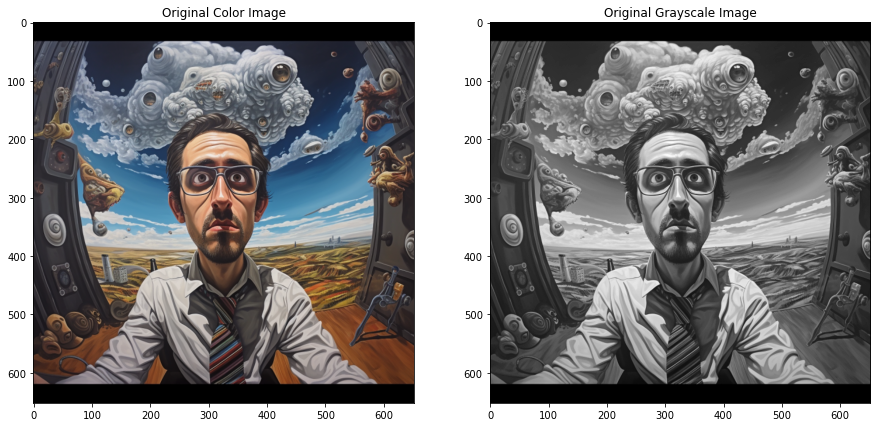

After applying PCA:


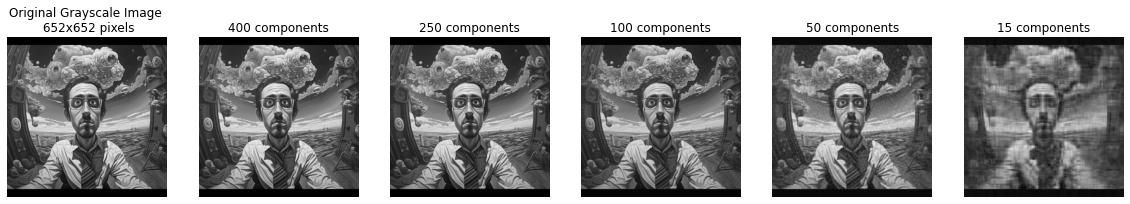

In [116]:
#Load the Dali image using Pillow
Dali = Image.open("Dali.png")  # Replace with the actual path to your image

#Convert the image to a NumPy array
Dali_array = np.array(Dali)

#Convert the image into grayscale
grayscale_Dali = Dali.convert("L")  # Converts to grayscale (2D array)

#Convert the grayscale image to a NumPy array
grayscale_Dali_array = np.array(grayscale_Dali)

#Applying PCA to Dali

#Generate a list with the PCs that will be tested:
num_components_list=[400, 250, 100, 50, 15]

#Store all results in a dictionary to access them later
pca_results={}

#Loop that calculates PCs according to the list and then store the result in a dictionary
for PCs in num_components_list:
    pca_Dali = PCA(n_components=PCs)
    pca_Dali.fit(grayscale_Dali_array)
    Dali_transformed=pca_Dali.transform(grayscale_Dali_array)
    Dali_projected=pca_Dali.inverse_transform(Dali_transformed)
    pca_results[PCs]=Dali_projected

#Plot
print("These are the original images:")
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(Dali_array)
plt.title("Original Color Image")

plt.subplot(1,2,2)
plt.imshow(grayscale_Dali_array,cmap='gray')
plt.title("Original Grayscale Image")
plt.show()

print("After applying PCA:")
plt.figure(figsize=(20, 10))
plt.subplot(1, len(num_components_list) +1, 1)
plt.imshow(grayscale_Dali_array, cmap='gray')
plt.axis('off')
plt.title(f'Original Grayscale Image \n 652x652 pixels')

i=2
for PCs in num_components_list:
    plt.subplot(1, len(num_components_list)+1, i)
    plt.imshow(pca_results[PCs], cmap='gray')
    plt.axis('off')
    plt.title(f'{PCs} components')
    i=i+1